## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp()

## 作業一、將 Epoch 加到 500 個，並觀察 learning curve 的走勢

In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.9409 - acc: 0.3010 - val_loss: 1.7676 - val_acc: 0.3768
Epoch 2/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.7189 - acc: 0.3865 - val_loss: 1.6451 - val_acc: 0.4148
Epoch 3/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.6299 - acc: 0.4156 - val_loss: 1.5898 - val_acc: 0.4269
Epoch 4/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.5616 - acc: 0.4440 - val_loss: 1.5446 - val_acc: 0.4511
Epoch 5/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.5091 - acc: 0.4647 - val_loss: 1.4923 - val_acc: 0.4701
Epoch 6/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.4657 - acc: 0.4785 - val_loss: 1.5097 - val_acc: 0.4649
Epoch 7/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.4403 - acc: 0.4872 - val_loss: 1.4675 -

50000/50000 [==============================] - 4s 77us/step - loss: 0.5132 - acc: 0.8171 - val_loss: 2.0764 - val_acc: 0.5103
Epoch 60/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.5182 - acc: 0.8151 - val_loss: 2.0678 - val_acc: 0.5187
Epoch 61/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.5132 - acc: 0.8163 - val_loss: 2.0496 - val_acc: 0.5218
Epoch 62/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.4901 - acc: 0.8238 - val_loss: 2.1103 - val_acc: 0.5119
Epoch 63/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.5004 - acc: 0.8204 - val_loss: 2.1405 - val_acc: 0.5095
Epoch 64/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.4828 - acc: 0.8268 - val_loss: 2.1393 - val_acc: 0.5109
Epoch 65/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.4730 - acc: 0.8293 - val_loss: 2.1668 - val_acc: 0.5116
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.2421 - acc: 0.9131 - val_loss: 3.3685 - val_acc: 0.4970
Epoch 119/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.2586 - acc: 0.9071 - val_loss: 3.4244 - val_acc: 0.5051
Epoch 120/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2403 - acc: 0.9121 - val_loss: 3.3781 - val_acc: 0.5023
Epoch 121/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.2132 - acc: 0.9239 - val_loss: 3.5100 - val_acc: 0.5031
Epoch 122/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.2249 - acc: 0.9190 - val_loss: 3.4995 - val_acc: 0.4930
Epoch 123/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.2533 - acc: 0.9111 - val_loss: 3.4784 - val_acc: 0.5025
Epoch 124/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.2132 - acc: 0.9229 - val_loss: 3.5213 - val_acc: 0.5001
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 62us/step - loss: 0.1600 - acc: 0.9426 - val_loss: 4.1803 - val_acc: 0.5034
Epoch 177/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1428 - acc: 0.9486 - val_loss: 4.1952 - val_acc: 0.5012
Epoch 178/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.1254 - acc: 0.9557 - val_loss: 4.1067 - val_acc: 0.5023
Epoch 179/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1761 - acc: 0.9374 - val_loss: 4.2428 - val_acc: 0.4916
Epoch 180/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1904 - acc: 0.9322 - val_loss: 4.1477 - val_acc: 0.5023
Epoch 181/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.1604 - acc: 0.9433 - val_loss: 4.1487 - val_acc: 0.5063
Epoch 182/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1535 - acc: 0.9463 - val_loss: 4.1595 - val_acc: 0.4988
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 61us/step - loss: 0.0980 - acc: 0.9654 - val_loss: 4.6510 - val_acc: 0.4980
Epoch 235/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.0922 - acc: 0.9683 - val_loss: 4.6362 - val_acc: 0.4957
Epoch 236/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.1732 - acc: 0.9407 - val_loss: 4.5946 - val_acc: 0.4976
Epoch 237/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.1509 - acc: 0.9497 - val_loss: 4.6294 - val_acc: 0.4926
Epoch 238/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1174 - acc: 0.9589 - val_loss: 4.5301 - val_acc: 0.5005
Epoch 239/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1290 - acc: 0.9547 - val_loss: 4.6380 - val_acc: 0.4997
Epoch 240/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1561 - acc: 0.9469 - val_loss: 4.5390 - val_acc: 0.4997
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 4s 73us/step - loss: 0.2158 - acc: 0.9332 - val_loss: 4.7950 - val_acc: 0.4828
Epoch 293/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.2271 - acc: 0.9315 - val_loss: 4.6909 - val_acc: 0.4952
Epoch 294/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.1019 - acc: 0.9656 - val_loss: 4.7132 - val_acc: 0.4967
Epoch 295/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0615 - acc: 0.9788 - val_loss: 4.7644 - val_acc: 0.5053
Epoch 296/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0467 - acc: 0.9842 - val_loss: 4.7921 - val_acc: 0.5036
Epoch 297/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0409 - acc: 0.9866 - val_loss: 4.8482 - val_acc: 0.4989
Epoch 298/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0951 - acc: 0.9683 - val_loss: 4.8540 - val_acc: 0.4926
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 68us/step - loss: 0.1164 - acc: 0.9616 - val_loss: 4.9156 - val_acc: 0.4953
Epoch 351/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1773 - acc: 0.9444 - val_loss: 4.9309 - val_acc: 0.4881
Epoch 352/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.0834 - acc: 0.9726 - val_loss: 4.9739 - val_acc: 0.4904
Epoch 353/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.0852 - acc: 0.9713 - val_loss: 4.8552 - val_acc: 0.4993
Epoch 354/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0721 - acc: 0.9762 - val_loss: 5.0275 - val_acc: 0.4944
Epoch 355/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1024 - acc: 0.9658 - val_loss: 5.0706 - val_acc: 0.4933
Epoch 356/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0865 - acc: 0.9713 - val_loss: 5.0124 - val_acc: 0.4960
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 5s 92us/step - loss: 0.0806 - acc: 0.9729 - val_loss: 4.9869 - val_acc: 0.4963
Epoch 409/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.0262 - acc: 0.9914 - val_loss: 4.9825 - val_acc: 0.5014
Epoch 410/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.0153 - acc: 0.9959 - val_loss: 5.0129 - val_acc: 0.5020
Epoch 411/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.0107 - acc: 0.9977 - val_loss: 5.0417 - val_acc: 0.5051
Epoch 412/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0080 - acc: 0.9986 - val_loss: 5.0102 - val_acc: 0.5070
Epoch 413/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.3495 - acc: 0.9182 - val_loss: 5.1297 - val_acc: 0.4714
Epoch 414/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.2585 - acc: 0.9288 - val_loss: 4.8564 - val_acc: 0.4922
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 65us/step - loss: 0.0025 - acc: 0.9999 - val_loss: 4.9394 - val_acc: 0.5069
Epoch 467/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0028 - acc: 0.9999 - val_loss: 4.9724 - val_acc: 0.5055
Epoch 468/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.6517 - acc: 0.8602 - val_loss: 4.3369 - val_acc: 0.4886
Epoch 469/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.2344 - acc: 0.9270 - val_loss: 4.4327 - val_acc: 0.4980
Epoch 470/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0564 - acc: 0.9813 - val_loss: 4.5188 - val_acc: 0.5063
Epoch 471/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0362 - acc: 0.9889 - val_loss: 4.6304 - val_acc: 0.5015
Epoch 472/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.0174 - acc: 0.9960 - val_loss: 4.6418 - val_acc: 0.5032
Epoch 473/500
50000/50000 [=======

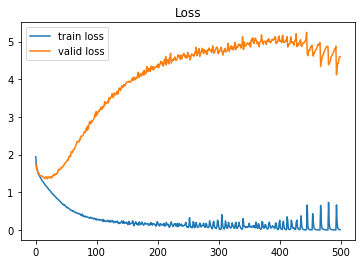

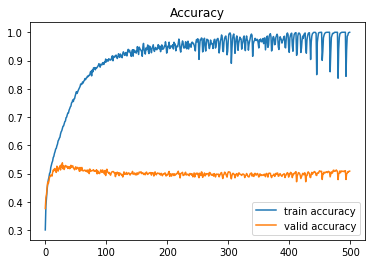

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業二、將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [21]:
model2 = build_mlp()

In [22]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [23]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [24]:
"""
設定要訓練的 Epoch 數
"""
model2.fit(x_train, y_train, 
           epochs=500, 
           batch_size=256, 
           validation_data=(x_test, y_test), 
           shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.2786 - acc: 0.1490 - val_loss: 2.2323 - val_acc: 0.1880
Epoch 2/500
50000/50000 [==============================] - 3s 51us/step - loss: 2.2024 - acc: 0.2104 - val_loss: 2.1749 - val_acc: 0.2308
Epoch 3/500
50000/50000 [==============================] - 3s 53us/step - loss: 2.1495 - acc: 0.2488 - val_loss: 2.1257 - val_acc: 0.2674
Epoch 4/500
50000/50000 [==============================] - 3s 53us/step - loss: 2.1026 - acc: 0.2743 - val_loss: 2.0807 - val_acc: 0.2824
Epoch 5/500
50000/50000 [==============================] - 2s 49us/step - loss: 2.0607 - acc: 0.2905 - val_loss: 2.0412 - val_acc: 0.2970
Epoch 6/500
50000/50000 [==============================] - 3s 51us/step - loss: 2.0245 - acc: 0.3016 - val_loss: 2.0085 - val_acc: 0.3032
Epoch 7/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.9952 - acc: 0.3097 - val_loss: 1.9818 - 

50000/50000 [==============================] - 2s 49us/step - loss: 1.6730 - acc: 0.4160 - val_loss: 1.6763 - val_acc: 0.4127
Epoch 60/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.6702 - acc: 0.4182 - val_loss: 1.6723 - val_acc: 0.4162
Epoch 61/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.6671 - acc: 0.4189 - val_loss: 1.6692 - val_acc: 0.4164
Epoch 62/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.6643 - acc: 0.4206 - val_loss: 1.6680 - val_acc: 0.4145
Epoch 63/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.6617 - acc: 0.4210 - val_loss: 1.6640 - val_acc: 0.4228
Epoch 64/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.6586 - acc: 0.4217 - val_loss: 1.6635 - val_acc: 0.4199
Epoch 65/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.6559 - acc: 0.4218 - val_loss: 1.6596 - val_acc: 0.4229
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5338 - acc: 0.4637 - val_loss: 1.5532 - val_acc: 0.4564
Epoch 119/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.5321 - acc: 0.4645 - val_loss: 1.5533 - val_acc: 0.4573
Epoch 120/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.5303 - acc: 0.4650 - val_loss: 1.5508 - val_acc: 0.4550
Epoch 121/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.5282 - acc: 0.4670 - val_loss: 1.5519 - val_acc: 0.4554
Epoch 122/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.5262 - acc: 0.4664 - val_loss: 1.5472 - val_acc: 0.4565
Epoch 123/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.5246 - acc: 0.4672 - val_loss: 1.5445 - val_acc: 0.4581
Epoch 124/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5223 - acc: 0.4675 - val_loss: 1.5430 - val_acc: 0.4592
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 47us/step - loss: 1.4377 - acc: 0.4968 - val_loss: 1.4806 - val_acc: 0.4731
Epoch 177/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.4364 - acc: 0.4971 - val_loss: 1.4788 - val_acc: 0.4769
Epoch 178/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.4350 - acc: 0.4981 - val_loss: 1.4774 - val_acc: 0.4747
Epoch 179/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.4329 - acc: 0.4984 - val_loss: 1.4765 - val_acc: 0.4749
Epoch 180/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4320 - acc: 0.4997 - val_loss: 1.4822 - val_acc: 0.4725
Epoch 181/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.4304 - acc: 0.4996 - val_loss: 1.4786 - val_acc: 0.4732
Epoch 182/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.4290 - acc: 0.5004 - val_loss: 1.4770 - val_acc: 0.4730
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 1.3574 - acc: 0.5251 - val_loss: 1.4287 - val_acc: 0.4894
Epoch 235/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.3566 - acc: 0.5253 - val_loss: 1.4320 - val_acc: 0.4908
Epoch 236/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.3551 - acc: 0.5255 - val_loss: 1.4354 - val_acc: 0.4910
Epoch 237/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.3540 - acc: 0.5267 - val_loss: 1.4297 - val_acc: 0.4932
Epoch 238/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.3526 - acc: 0.5267 - val_loss: 1.4278 - val_acc: 0.4941
Epoch 239/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.3512 - acc: 0.5264 - val_loss: 1.4335 - val_acc: 0.4915
Epoch 240/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.3503 - acc: 0.5278 - val_loss: 1.4219 - val_acc: 0.4915
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 48us/step - loss: 1.2864 - acc: 0.5509 - val_loss: 1.3923 - val_acc: 0.5056
Epoch 293/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.2853 - acc: 0.5504 - val_loss: 1.4093 - val_acc: 0.5000
Epoch 294/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2839 - acc: 0.5516 - val_loss: 1.3995 - val_acc: 0.4996
Epoch 295/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.2834 - acc: 0.5522 - val_loss: 1.3943 - val_acc: 0.5024
Epoch 296/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2818 - acc: 0.5522 - val_loss: 1.3897 - val_acc: 0.5051
Epoch 297/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2801 - acc: 0.5519 - val_loss: 1.3877 - val_acc: 0.5064
Epoch 298/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.2798 - acc: 0.5518 - val_loss: 1.3906 - val_acc: 0.5062
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 53us/step - loss: 1.2216 - acc: 0.5734 - val_loss: 1.3649 - val_acc: 0.5181
Epoch 351/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.2200 - acc: 0.5751 - val_loss: 1.3744 - val_acc: 0.5125
Epoch 352/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.2194 - acc: 0.5730 - val_loss: 1.3687 - val_acc: 0.5149
Epoch 353/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.2176 - acc: 0.5754 - val_loss: 1.3968 - val_acc: 0.5032
Epoch 354/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2170 - acc: 0.5752 - val_loss: 1.3587 - val_acc: 0.5177
Epoch 355/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.2158 - acc: 0.5751 - val_loss: 1.3791 - val_acc: 0.5125
Epoch 356/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2143 - acc: 0.5770 - val_loss: 1.3792 - val_acc: 0.5098
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 49us/step - loss: 1.1591 - acc: 0.5961 - val_loss: 1.3511 - val_acc: 0.5213
Epoch 409/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.1570 - acc: 0.5962 - val_loss: 1.3920 - val_acc: 0.5095
Epoch 410/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1560 - acc: 0.5973 - val_loss: 1.3588 - val_acc: 0.5188
Epoch 411/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1557 - acc: 0.5974 - val_loss: 1.3616 - val_acc: 0.5196
Epoch 412/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.1546 - acc: 0.5967 - val_loss: 1.3631 - val_acc: 0.5122
Epoch 413/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.1532 - acc: 0.5989 - val_loss: 1.3654 - val_acc: 0.5133
Epoch 414/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.1527 - acc: 0.5969 - val_loss: 1.3519 - val_acc: 0.5214
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 49us/step - loss: 1.0986 - acc: 0.6173 - val_loss: 1.3944 - val_acc: 0.5035
Epoch 467/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.0999 - acc: 0.6164 - val_loss: 1.3695 - val_acc: 0.5168
Epoch 468/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0964 - acc: 0.6178 - val_loss: 1.3470 - val_acc: 0.5186
Epoch 469/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0947 - acc: 0.6181 - val_loss: 1.3426 - val_acc: 0.5245
Epoch 470/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.0943 - acc: 0.6187 - val_loss: 1.3652 - val_acc: 0.5142
Epoch 471/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.0934 - acc: 0.6200 - val_loss: 1.3611 - val_acc: 0.5204
Epoch 472/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.0923 - acc: 0.6189 - val_loss: 1.3339 - val_acc: 0.5275
Epoch 473/500
50000/50000 [=======

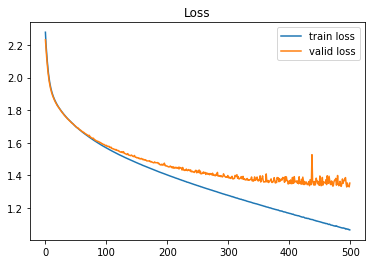

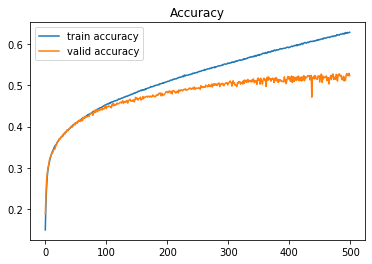

In [25]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()